# Multiple Linear Regression

Similar to Simple Linear Regression, Multiple Linear Regression (MLR) has certain assumptions. These are as follows:
 - Homoscedasticity: The residuals should have constant variance across all levels of the independent variables.
 - Normality: The residuals of the model should be normally distributed (bell-shaped).
 - Independence of observations : Each observation should be independent of others, with no correlation between them.
 - Multicollinearity: Independent variables should not be perfectly correlated with each other.

We take the example of life expectancy, which depends on multiple factors such as alcohol consumption, polio vaccination rates, schooling levels, and more. We will conduct an analysis of the dataset, perform exploratory data analysis (EDA), and then proceed with building the model.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

life_expectancy=pd.read_csv('Life Expectancy Data.csv')
life_expectancy.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [13]:
life_expectancy.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

### EDA

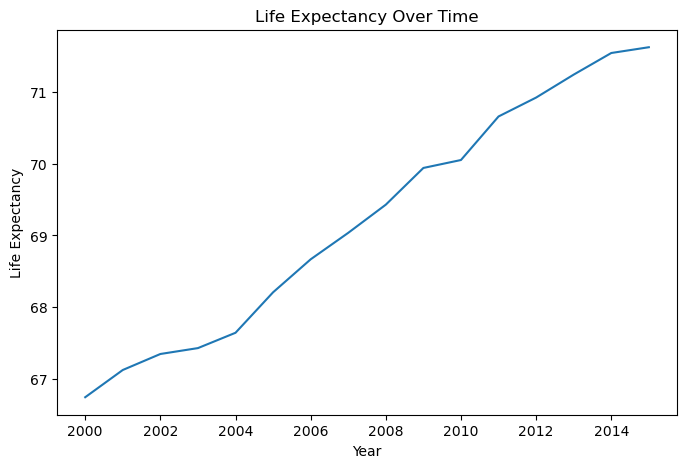

In [4]:
life_expectancy_by_year=life_expectancy.groupby('Year')['Life expectancy '].mean()

plt.figure(figsize=(8,5))

plt.plot(life_expectancy_by_year)
plt.title('Life Expectancy Over Time')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.show()

The line plot shows a steady increase in life expectancy from 2000 to 2015, reflecting continuous improvements in healthcare, living standards, and disease management. This upward trend suggests that people are living longer due to advancements in medical care, reduced infant mortality, and better access to health services.

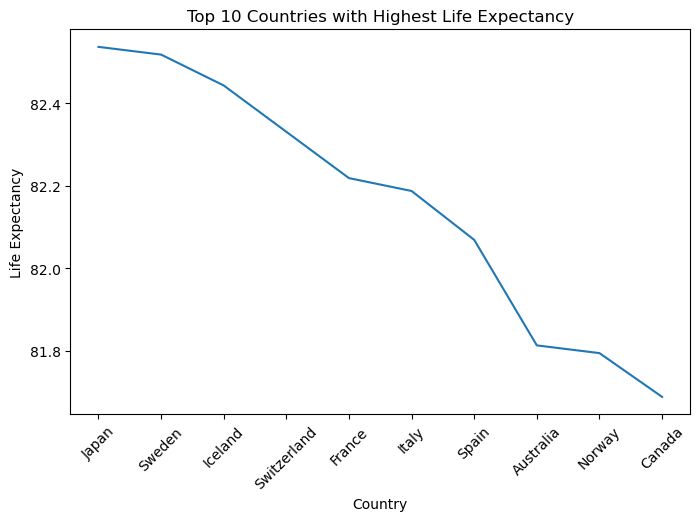

In [24]:
life_expectancy.Country.nunique()
life_expectancy_by_country=life_expectancy.groupby('Country')['Life expectancy '].mean()

life_expectancy_by_country=life_expectancy_by_country.sort_values(ascending=False).head(10)

plt.figure(figsize=(8,5))
plt.plot(life_expectancy_by_country)
plt.title('Top 10 Countries with Highest Life Expectancy')
plt.xlabel('Country')
plt.ylabel('Life Expectancy')

plt.xticks(rotation=45)
plt.show()

The line plot of the top 10 countries with the highest life expectancy reveals a predominance of high-income nations, particularly from Europe, along with Japan, Australia, and Canada.

### Preprocessing

We can select a few features that may impact life expectancy and conduct further correlation analysis to determine which features to include in the modeling.

In [42]:
data_for_analysis=life_expectancy.select_dtypes(include=['float64', 'int64'])
selected_features = ['Life expectancy ', 'Adult Mortality', 'Schooling', 'Income composition of resources', 'Alcohol', ' HIV/AIDS',' thinness  1-19 years', 'Diphtheria ','Polio']

X=data_for_analysis[selected_features].dropna()

# Find the correlation between variables
matrix=X.corr()
matrix

,Life expectancy,Adult Mortality,Schooling,Income composition of resources,Alcohol,HIV/AIDS,thinness 1-19 years,Diphtheria,Polio
Life expectancy,1.000000,-0.678233,0.757073,0.718515,0.380365,-0.571598,-0.464073,0.461277,0.451114
Adult Mortality,-0.678233,1.000000,-0.444687,-0.444191,-0.169388,0.535768,0.290571,-0.246830,-0.252889
Schooling,0.757073,-0.444687,1.000000,0.781893,0.546310,-0.230372,-0.484022,0.422706,0.415509
Income composition of resources,0.718515,-0.444191,0.781893,1.000000,0.446423,-0.251413,-0.424056,0.399322,0.377713
Alcohol,0.380365,-0.169388,0.546310,0.446423,1.000000,-0.040778,-0.418698,0.201363,0.201363
HIV/AIDS,-0.571598,0.535768,-0.230372,-0.251413,-0.040778,1.000000,0.198790,-0.167561,-0.161942
thinness 1-19 years,-0.464073,0.290571,-0.484022,-0.424056,-0.418698,0.198790,1.000000,-0.222993,-0.214967
Diphtheria,0.461277,-0.246830,0.422706,0.399322,0.201363,-0.167561,-0.222993,1.000000,0.677344
Polio,0.451114,-0.252889,0.415509,0.377713,0.201363,-0.161942,-0.214967,0.677344,1.000000


While performing correlation analysis of the features with respect to life expectancy, we observed a strong positive correlation with Income Composition of Resources (r = 0.78) and Schooling (r = 0.72), indicating that a more equitable distribution of income and higher educational attainment are associated with increased life expectancy. Additionally, a moderate positive correlation with Alcohol consumption (r = 0.40) suggests that certain lifestyle factors may play a role in longevity. Conversely, there are strong negative correlations with Adult Mortality (r = -0.72) and HIV/AIDS (r = -0.59), highlighting that higher adult mortality rates and greater prevalence of HIV/AIDS are associated with lower life expectancy.

### Multicollinearity Check with VIF

According to the assumption discussed earlier regarding multicollinearity, we assess multicollinearity among independent variables by calculating the Variance Inflation Factor (VIF). A VIF value greater than 10 indicates high multicollinearity.To assess multicollinearity among independent variables, we calculate the Variance Inflation Factor (VIF). A VIF value greater than 10 indicates high multicollinearity.

In [4]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data=pd.DataFrame()
vif_data['Features']= X.columns
vif_data['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif_data=vif_data.iloc[1:]

# Display VIF results
print(vif_data)


                          Features        VIF
1                  Adult Mortality   3.789678
2                        Schooling  57.971528
3  Income composition of resources  28.187482
4                          Alcohol   3.490653
5                         HIV/AIDS   1.740594
6             thinness  1-19 years   2.817047
7                      Diphtheria   27.160441
8                            Polio  27.354318


Schooling (VIF = 73.92) exhibits exceptionally high multicollinearity, suggesting a strong correlation with other independent variables in the model. In contrast, Adult Mortality (VIF = 3.91), Alcohol (VIF = 3.94), HIV/AIDS (VIF = 1.77), and Thinness 1-19 Years (VIF = 2.67) present low VIF values, indicating that these variables have minimal correlation with the other predictors. As a result, they are likely to provide stable estimates in the regression model, enhancing the overall reliability of the analysis.

In [65]:
X.columns

Index(['Life expectancy ', 'Adult Mortality', 'Schooling',
       'Income composition of resources', 'Alcohol', ' HIV/AIDS',
       ' thinness  1-19 years', 'Diphtheria ', 'Polio'],
      dtype='object')

In [43]:
# Strip spaces from column names
X.columns = X.columns.str.strip()
X_filtered=X.drop(columns=['Schooling', 'Income composition of resources', 'Diphtheria', 'Polio'])

In [67]:
X_filtered

,Life expectancy,Adult Mortality,Alcohol,HIV/AIDS,thinness 1-19 years
0,65.0,263.0,0.01,0.1,17.2
1,59.9,271.0,0.01,0.1,17.5
2,59.9,268.0,0.01,0.1,17.7
3,59.5,272.0,0.01,0.1,17.9
4,59.2,275.0,0.01,0.1,18.2
...,...,...,...,...,...
2933,44.3,723.0,4.36,33.6,9.4
2934,44.5,715.0,4.06,36.7,9.8
2935,44.8,73.0,4.43,39.8,1.2
2936,45.3,686.0,1.72,42.1,1.6


### Model Building

Define the dependent and independent variables

In [44]:
from sklearn.model_selection import train_test_split


y=X_filtered.iloc[:,0]
X=X_filtered.iloc[:,1:]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

### Model 1

In [45]:
from sklearn.linear_model import LinearRegression

model1=LinearRegression()
model1.fit(X_train,y_train)
# Model prediction
predictions=model1.predict(X_test)

In [46]:
from sklearn.metrics import mean_squared_error, r2_score

r2=r2_score(y_test,predictions)
print('R-squared:', r2)
mse=mean_squared_error(y_test,predictions)
print('Mean Squared Error:', mse)

R-squared: 0.579528947298472
Mean Squared Error: 36.3683996433065


The model has an R-squared value of 0.58, indicating it explains about 58% of the variance in life expectancy, which reflects a moderate level of predictive accuracy. The Mean Squared Error of approximately 36.37 suggests that the predictions deviate from the actual values, indicating there is room for improvement in the model's performance.

Text(0.5, 1.0, 'Q-Q Plot of Residuals')

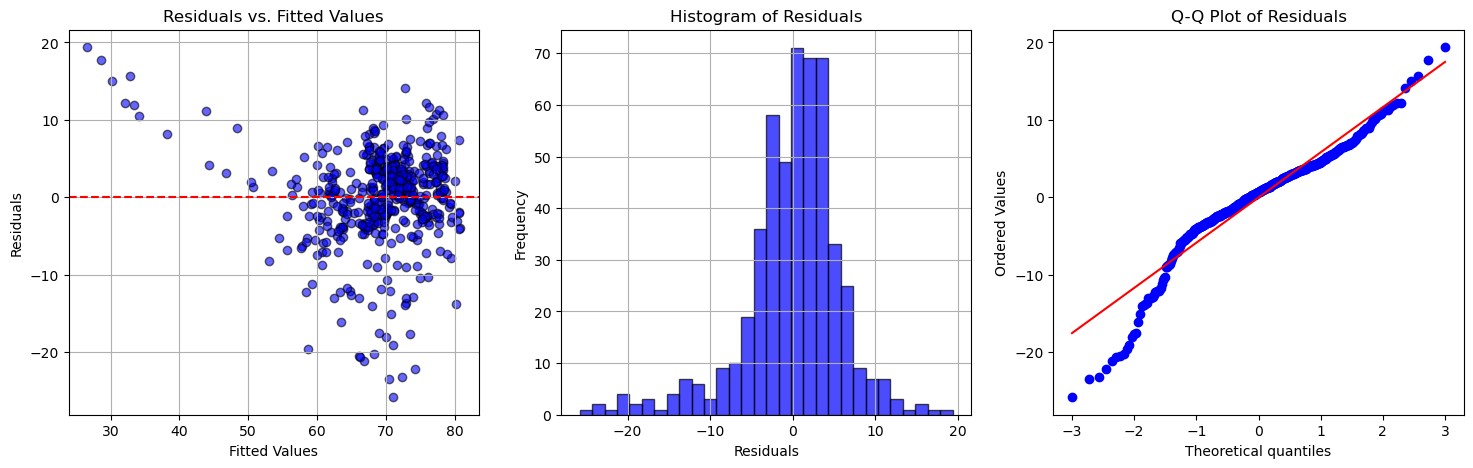

In [47]:
residuals=y_test-predictions
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Residuals vs. Fitted Values
axes[0].scatter(predictions, residuals, color='blue', alpha=0.6, edgecolors='k')
axes[0].axhline(y=0, color='red', linestyle='--')
axes[0].set_title('Residuals vs. Fitted Values')
axes[0].set_xlabel('Fitted Values')
axes[0].set_ylabel('Residuals')
axes[0].grid()

# Histogram of Residuals
axes[1].hist(residuals, bins=30, color='blue', edgecolor='k', alpha=0.7)
axes[1].set_title('Histogram of Residuals')
axes[1].set_xlabel('Residuals')
axes[1].set_ylabel('Frequency')
axes[1].grid()

# Q-Q Plot
stats.probplot(residuals, dist="norm", plot=axes[2])
axes[2].set_title('Q-Q Plot of Residuals')



### Model 2

We can utilize interaction terms among the filtered columns to explore their combined effects on the target variable, life expectancy.

In [7]:
X.columns

Index(['Life expectancy', 'Adult Mortality', 'Schooling',
       'Income composition of resources', 'Alcohol', 'HIV/AIDS',
       'thinness  1-19 years', 'Diphtheria', 'Polio',
       'Schooling_Income_Interaction', 'Alcohol_HIV_Interaction',
       'AdultMortality_Alcohol_Interaction'],
      dtype='object')

In [17]:
filtered_columns=['Schooling', 'Income composition of resources', 'Diphtheria', 'Polio']

X['Schooling_Income_Interaction'] = X['Schooling'] * X['Income composition of resources']
X['Alcohol_HIV_Interaction'] = X['Alcohol'] * X['HIV/AIDS']
X['AdultMortality_Alcohol_Interaction'] = X['Adult Mortality'] * X['Alcohol']
X['Thinness_Diphtheria_Interaction'] = X['thinness  1-19 years'] * X['Diphtheria']
# Combine original and interaction terms for VIF calculation
features = filtered_columns + ['Schooling_Income_Interaction', 
                                'Alcohol_HIV_Interaction', 
                                'AdultMortality_Alcohol_Interaction', 
                                'Thinness_Diphtheria_Interaction']

# Step 2: Check VIF for collinearity
vif_data = pd.DataFrame()
vif_data['Feature'] = features
vif_data['VIF'] = [variance_inflation_factor(X[features].values, i) for i in range(len(features))]

print("VIF Values:")
print(vif_data.tail(4))

VIF Values:
                              Feature        VIF
4        Schooling_Income_Interaction  43.159807
5             Alcohol_HIV_Interaction   1.508432
6  AdultMortality_Alcohol_Interaction   2.265754
7     Thinness_Diphtheria_Interaction   2.962052


The VIF results show that the Schooling_Income_Interaction term has a high multicollinearity, which may cause issues in the model. On the other hand, the Alcohol_HIV_Interaction and Thinness_Diphtheria_Interaction terms have low VIF values, making them good options to include in the model for better predictions without complications.

In [21]:
X_filtered_model2=X.drop(columns=filtered_columns+['Schooling_Income_Interaction'])
X_filtered_model2

,Life expectancy,Adult Mortality,Alcohol,HIV/AIDS,thinness 1-19 years,Alcohol_HIV_Interaction,AdultMortality_Alcohol_Interaction,Thinness_Diphtheria_Interaction
0,65.0,263.0,0.01,0.1,17.2,0.001,2.63,1118.0
1,59.9,271.0,0.01,0.1,17.5,0.001,2.71,1085.0
2,59.9,268.0,0.01,0.1,17.7,0.001,2.68,1132.8
3,59.5,272.0,0.01,0.1,17.9,0.001,2.72,1199.3
4,59.2,275.0,0.01,0.1,18.2,0.001,2.75,1237.6
...,...,...,...,...,...,...,...,...
2933,44.3,723.0,4.36,33.6,9.4,146.496,3152.28,611.0
2934,44.5,715.0,4.06,36.7,9.8,149.002,2902.90,666.4
2935,44.8,73.0,4.43,39.8,1.2,176.314,323.39,85.2
2936,45.3,686.0,1.72,42.1,1.6,72.412,1179.92,120.0


In [24]:
y=X_filtered_model2.iloc[:,0]
X=X_filtered_model2.iloc[:,1:]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [28]:
model2=LinearRegression()

model2.fit(X_train,y_train)

# Model prediction
predictions2=model2.predict(X_test)

In [30]:
r2=r2_score(y_test,predictions2)
print('R-squared:', r2)
mse=mean_squared_error(y_test,predictions2)
print('Mean Squared Error:', mse)

R-squared: 0.6242120839240607
Mean Squared Error: 32.50355767695734


The model has an R-squared value of 0.62, indicating it explains about 62% of the variance in life expectancy, which shows moderate predictive accuracy. The Mean Squared Error of approximately 32.50 suggests that there is some discrepancy between predicted and actual values, indicating potential for improvement in the model’s predictions.

# Conclusion

The model with interaction terms provides better insights into the relationships between variables influencing life expectancy. The increase in predictive power indicates that the interactions between certain features are significant and should be considered in analyses.

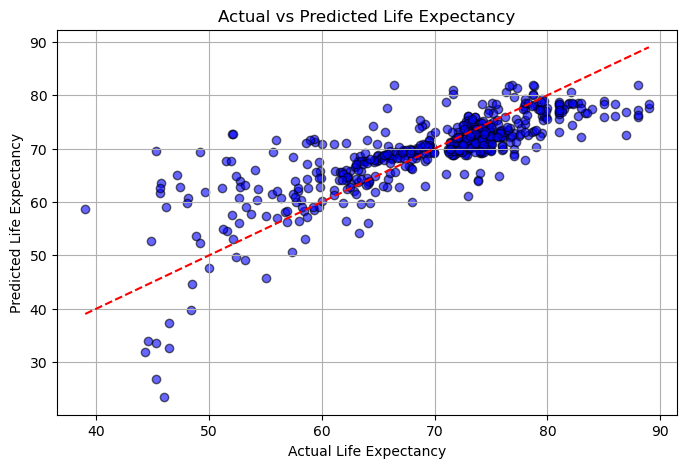

In [39]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, predictions2, color='blue', alpha=0.6, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Line of equality
plt.title('Actual vs Predicted Life Expectancy')
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.grid()
plt.show()

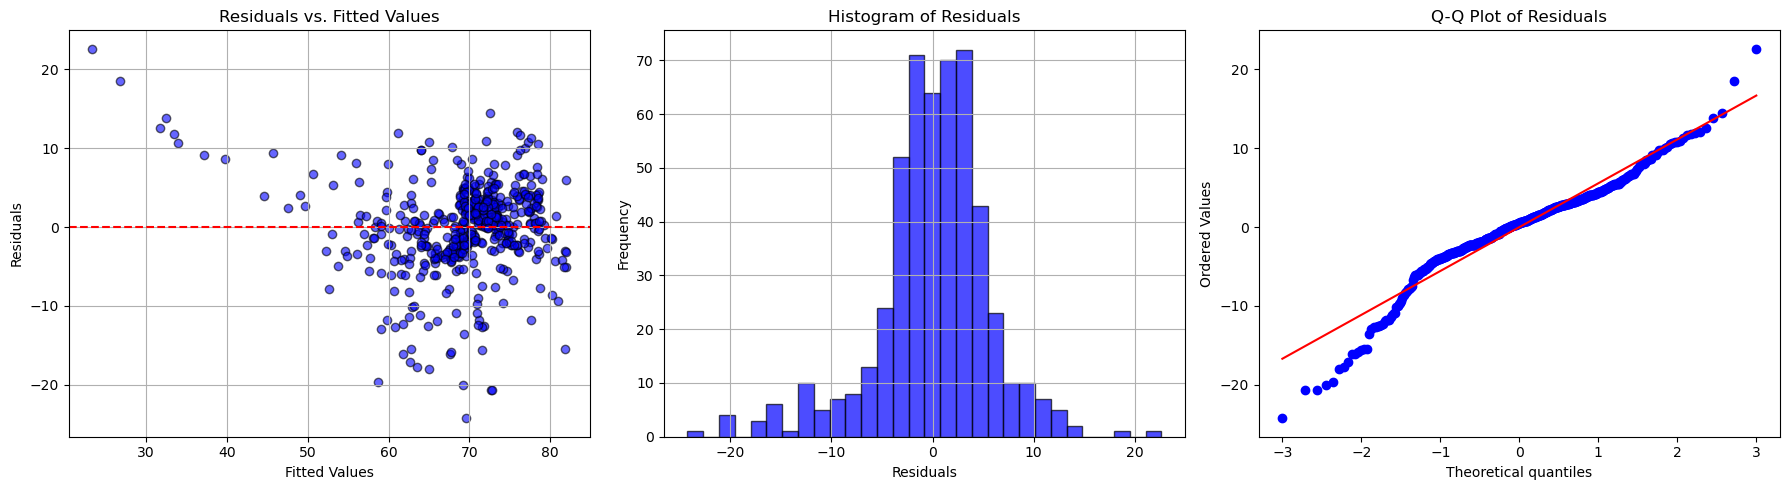

In [41]:
import scipy.stats as stats

residuals = y_test - predictions2
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Residuals vs. Fitted Values
axes[0].scatter(predictions2, residuals, color='blue', alpha=0.6, edgecolors='k')
axes[0].axhline(y=0, color='red', linestyle='--')
axes[0].set_title('Residuals vs. Fitted Values')
axes[0].set_xlabel('Fitted Values')
axes[0].set_ylabel('Residuals')
axes[0].grid()

# Histogram of Residuals
axes[1].hist(residuals, bins=30, color='blue', edgecolor='k', alpha=0.7)
axes[1].set_title('Histogram of Residuals')
axes[1].set_xlabel('Residuals')
axes[1].set_ylabel('Frequency')
axes[1].grid()

# Q-Q Plot
stats.probplot(residuals, dist="norm", plot=axes[2])
axes[2].set_title('Q-Q Plot of Residuals')

# Adjust layout
plt.tight_layout()
plt.show()

The residuals exhibit spread which increases at both lower and higher fitted values, suggesting the presence of heteroscedasticity. This indicates that the variance of the errors is not constant across all levels of the fitted values, which violates one of the key assumptions of linear regression. Furthermore, while the residuals are centered around zero, the histogram reveals a slight right-skewness, indicating that more residuals have positive values. Additionally, the Q-Q plot shows noticeable deviations from the expected line at both tails, suggesting the presence of heavy tails in the residual distribution. This implies that extreme residual values are more frequent than what would be expected under a normal distribution, further indicating that the assumption of normality may not fully hold.